In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs

#X, y = make_blobs(n_samples = 50, centers = 2, random_state = 0, cluster_std = 0.60)
#plt.scatter(X[:,0], X[:, 1], c= y, s = 50, cmap = 'autumn')

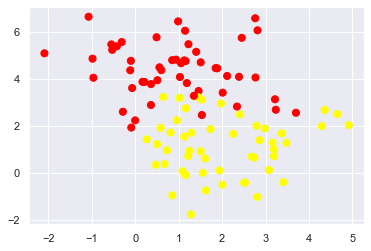

In [2]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

"SVM class with fitting and prediction functions"

In [6]:
def SVM(X,y,lr, C, lambdaa, n_iter):
    
    n_samples, n_features = X.shape[:2]
    w = np.zeros(n_features)
    b = 0
    
    for i in range(n_iter):
        for idx, x_i in enumerate(X):
            if (y[idx] * (np.dot(x_i, w) - b) >= 1):
                w -= lr  * lambdaa * w 
                b = 0
            else :
                w -= lr * ( lambdaa * w - C* np.dot(x_i, y[idx]))
                b -= lr * C * y[idx]
     
    y_ = np.dot(X,w)-b
    
    return np.sign(y_),w,b
                

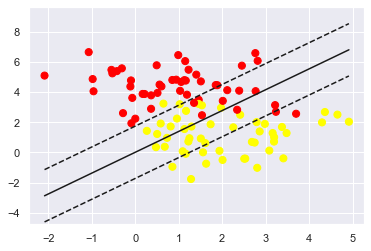

In [10]:


y = np.where(y <= 0, -1, 1)

clf,w,b = SVM(X,y, 0.001, 3, 0.001,1000)


def visualize_svm():
    
        # hyperplane = x.w+b
        # v = x0.w0+x1.w1+b -> x1 = (v-w[0].x[0]-b)/w1
        def hyperplane_value(x, w, b, v):
            return (-w[0] * x + b + v) / w[1]

        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        plt.scatter(X[:,0], X[:, 1], c= y, s = 50, cmap = 'autumn')

        x_min = np.amin(X[:, 0])
        x_max = np.amax(X[:, 0])
        
        # (w.x+b)=0
        # support vector hyperplane
        x1_1 = hyperplane_value(x_min, w, b, 0)
        x1_2 = hyperplane_value(x_max, w, b, 0)
        ax.plot([x_min, x_max], [x1_1, x1_2], "k")
        
        # (w.x+b)=-1
        # negative support vector hyperplane
        x1_1_n = hyperplane_value(x_min, w, b, -1)
        x1_2_n = hyperplane_value(x_max, w, b, -1)
        ax.plot([x_min, x_max], [x1_1_n, x1_2_n], "k--")
        
        # (w.x+b)=1
        # positive support vector hyperplane
        x1_1_p = hyperplane_value(x_min, w, b, 1)
        x1_2_p = hyperplane_value(x_max, w, b, 1)
        ax.plot([x_min, x_max], [x1_1_p, x1_2_p], "k--")

        
        
        

        x1_min = np.amin(X[:, 1])
        x1_max = np.amax(X[:, 1])
        ax.set_ylim([x1_min - 3, x1_max + 3])

        plt.show()

visualize_svm()